OBJ:
* create new df (with daily datetime index), that can calculate the morning situation @ a given hour.
* do for both ED and IP

In [1]:
import pandas as pd
import numpy as np

In [2]:
ED = pd.read_pickle('./../../data/raw/cleanED.pkl')

In [3]:
IP = pd.read_pickle('./../../data/raw/cleanSPELL.pkl')

In [4]:
ED.head()

,pseudo_patient_number,attendance_number,age,gender,site_attended,arrive_datetime,arrival_mode,arrival_mode_desc,1st_time_triaged_[datetime],1st_time_seen_by_doctor,...,time_into_cdu,depart_datetime,majorsminorsresus_patient,triage_category,flag_admission,flag_bedreq,flag_specreq,flag_cdu,date,mmr_null
0,004101045105,90902325901,94,0,Main ED,2009-04-13 09:16:00,NaN,BROUGHT IN BY AMBULANCE,NaN,2009-04-13 10:28:00,...,NaT,2009-04-13 12:24:00,Majors,VERY URGENT,0,1,1,1,2009-04-13,False
1,644868441371,90902326101,47,1,Main ED,2009-04-13 09:22:00,NaN,BROUGHT IN BY AMBULANCE,NaN,2009-04-13 09:30:00,...,NaT,2009-04-13 12:55:00,Majors,VERY URGENT,1,1,1,1,2009-04-13,False
4,423646238168,90902328801,31,0,Main ED,2009-04-13 11:18:00,NaN,BROUGHT IN BY AMBULANCE,NaN,2009-04-13 12:00:00,...,NaT,2009-04-13 14:49:00,Majors,VERY URGENT,1,1,0,1,2009-04-13,False
5,171919719129,90902329101,25,1,Main ED,2009-04-13 11:26:00,NaN,BROUGHT IN BY AMBULANCE,NaN,2009-04-13 11:27:00,...,NaT,2009-04-13 14:21:00,Resus,Immediate,1,1,1,1,2009-04-13,False
6,178616788368,90902329801,31,1,Main ED,2009-04-13 11:46:00,NaN,BROUGHT IN BY AMBULANCE,NaN,2009-04-13 12:43:00,...,NaT,2009-04-13 15:44:00,Majors,VERY URGENT,0,1,1,1,2009-04-13,False


In [5]:
ED.majorsminorsresus_patient.value_counts()

Majors    333275
Minors    250152
other      74027
Resus      55115
Name: majorsminorsresus_patient, dtype: int64

In [6]:
for i in ED.columns:
    print(i)

pseudo_patient_number
attendance_number
age
gender
site_attended
arrive_datetime
arrival_mode
arrival_mode_desc
1st_time_triaged_[datetime]
1st_time_seen_by_doctor
time_of_inpatient_bed_request
time_of_speciality_referral
speciality_referred_to
time_into_cdu
depart_datetime
majorsminorsresus_patient
triage_category
flag_admission
flag_bedreq
flag_specreq
flag_cdu
date
mmr_null


In [7]:
IP.head(2)

,pseudo_patient_number,age,gender,spell_number,adm_datetime,dis_datetime,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,discharge_destination_desc,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER,ADM_METHOD_simple,admission_type,ward_moves
0,353232538008,79,2,6222150,2009-04-29 14:19:00,2009-04-29 15:08:00,13,ELECTIVE PLANNED,0,19,...,USUAL PLACE OF RESIDENCE,08-MAY-18 00:00,1160,UROLOGY ENDOSCOPY SGH,2009-04-29 14:19:00,2009-04-29 15:08:00,1,other,Day Case,1
1,352434524354,24,2,6279602,2009-08-20 23:00:00,2009-08-21 02:00:00,31,MATERNITY ANTE PARTUM,1,19,...,OTHER-GEN.WARD/YOUNG PHYS.DIS.,NaN,1269,DELIVERY SUITE,2009-08-20 23:00:00,2009-08-21 02:01:00,1,Maternity,Non-Elective,1


In [8]:
IP.admission_method_description.value_counts()

EMERGENCY A+E                    295245
ELECTIVE WAITING LIST            294290
ELECTIVE PLANNED                 220850
EMERGENCY GP                      73897
MATERNITY ANTE PARTUM             72518
ELECTIVE BOOKED                   63090
OTHER EMERGENCY ADMISSION         25874
OTHER EMERGENCY                   20675
OTHER HEALTH CARE PROVIDER        13726
EMERGENCY CONSULTANT O/P          12728
EM TX OF INPAT FROM OTHER HOS      5685
MATERNITY POST PARTUM              4322
OTHER A+E WHERE NOT ADMITTED       2360
EMERGENCY BED BUREAU                  9
Name: admission_method_description, dtype: int64

In [9]:
for i in IP.columns:
    print(i)

pseudo_patient_number
age
gender
spell_number
adm_datetime
dis_datetime
admission_method_code
admission_method_description
length_of_stay_days
admission_source_code
admission_source_description
discharge_method_code
discharge_method_description
discharge_destination_code
discharge_destination_desc
date_of_death
ward_code
ward_code_description
ward_stay_start_date
ward_stay_end_date
LOCATION_NUMBER
ADM_METHOD_simple
admission_type
ward_moves


# Functions to create daily features

## Day Instance calcs

ED: 
- no of records (no in dept)
-

IP:
- no of patients in beds
- age: mean, num >65
- no admission type
- mean number of ward moves for patients currently in bed population(elec and non-elec).
 - no. patietns who came from GP and ED (elec and non-elec).

In [10]:
ED.columns

Index(['pseudo_patient_number', 'attendance_number', 'age', 'gender',
       'site_attended', 'arrive_datetime', 'arrival_mode', 'arrival_mode_desc',
       '1st_time_triaged_[datetime]', '1st_time_seen_by_doctor',
       'time_of_inpatient_bed_request', 'time_of_speciality_referral',
       'speciality_referred_to', 'time_into_cdu', 'depart_datetime',
       'majorsminorsresus_patient', 'triage_category', 'flag_admission',
       'flag_bedreq', 'flag_specreq', 'flag_cdu', 'date', 'mmr_null'],
      dtype='object')

In [39]:
def select_records_at_instance(df, datetime, start_col, end_col):
    """
    Takes df and selects only records active at a datetime.
    
    Return
    ======
    sample, dataframe , with only records which are of interest.
    
    """
#     sample = df[(df[start_col] <= datetime) & (df[end_col] >= datetime)]
    # new sampling added to include the patients who are still in the hospital and hence have no discharge/departure time.
    sample = df[((df[start_col] <= datetime) & (df[end_col] >= datetime)) | ((df[start_col] <= datetime) & (df[end_col].isnull()))]
    return(sample)

def ED_instance_calcs(df_sample, datetime):
    """
    Make calculations for records at the time.
    """
    calcs = {}
    calcs['occupancy'] = len(df_sample) # no attendances
    calcs['age_mean'] = df_sample['age'].mean()
    calcs['occ_age_75plus'] = len(df_sample[df_sample.age >= 75])
    calcs['occ_ambulance'] = len(df_sample[(df_sample.arrival_mode_desc == 'BROUGHT IN BY AMBULANCE')])
    calcs['occ_majors'] = len(df_sample[(df_sample.majorsminorsresus_patient == 'Majors')])
    calcs['occ_minors'] = len(df_sample[(df_sample.majorsminorsresus_patient == 'Minors')])
    calcs['occ_resus'] = len(df_sample[(df_sample.majorsminorsresus_patient == 'Resus')])
    calcs['occ_mmrother'] = len(df_sample[(df_sample.majorsminorsresus_patient == 'other')])
    
    # get current wait time of patients
    wait_times = datetime - df_sample.arrive_datetime
    calcs['wait_time_mean'] = int(wait_times.mean()/pd.Timedelta(1,'m')) # get mean waiting time in minutes
    calcs['wait_time_std'] = int(wait_times.std()/pd.Timedelta(1,'m')) # get std waiting time in minutes
    calcs['wait_time_skew'] = (wait_times/pd.Timedelta(1,'m')).skew() # get skew waiting time in minutes
    
    
    
    return(calcs)

def IP_instance_calcs(df_sample, datetime):
    """
    Make calculations for the records at the time.
    """
    calcs = {}
    calcs['occ_patients_total'] = len(df_sample) # no attendances
    calcs['occ_patients_nonelec'] = len(df_sample[df_sample.admission_type == "Non-Elective"])
    calcs['occ_patients_elec'] = len(df_sample[df_sample.admission_type == "Elective"])
    calcs['occ_patients_daycase'] = len(df_sample[df_sample.admission_type == "Day Case"])
    calcs['age_mean_elecnonelec'] = df_sample[(df_sample.admission_type == "Elective")|(df_sample.admission_type == "Non-Elective")]['age'].mean()
    calcs['occ_age_75plus_elecnonelec'] = len(df_sample[(df_sample.age >= 75) & (df_sample.admission_type != "Day Case")])
#     calcs['wardmoves_mean_elecnonelec'] = df_sample[(df_sample.admission_type != "Day Case")]['ward_moves'].mean()
    calcs['occ_patients_elecnonelec_gp'] = len(df_sample[(df_sample.admission_type != "Day Case") & (df_sample.ADM_METHOD_simple == "GP")])
    calcs['occ_patients_elecnonelec_ed'] = len(df_sample[(df_sample.admission_type != "Day Case") & (df_sample.ADM_METHOD_simple == "ED")])

    # get current los of patietns in beds (elec + non-elec)
    df_sample2 = df_sample[(df_sample.admission_type == "Elective")|(df_sample.admission_type == "Non-Elective")] # get only non-daycases 
    current_los = datetime - df_sample2.adm_datetime
    calcs['current_los_mean'] = int(current_los.mean()/pd.Timedelta(1,'h')) # get mean los  in h
    calcs['current_los_std'] = int(current_los.std()/pd.Timedelta(1,'h')) # get std los  in h
    calcs['current_los_skew'] = (current_los/pd.Timedelta(1,'h')).skew() # get skew los  in h
    
    return(calcs)

def get_instance_df(df, datetimes, df_type):
    """
    Calculate daily features from patient level records.
    
    Input
    =====
    df, dateframe, patient level records.
    datetimes, DateTimeIndex, datetime index of each date features are required for. 
    
    Return
    ======
    
    
    """
    temp_datetime = datetimes[0] # used only for initial run to get list of col names
    if df_type == 'ED':
        calculation_function = ED_instance_calcs
        col_dict = calculation_function(df, temp_datetime) # run function once to get list of columns names
        daily_features_columns = list(col_dict.keys())
        select_records_columns = ['arrive_datetime','depart_datetime'] # for use in select_records_in_period function
        
    elif df_type == 'IP':
        calculation_function = IP_instance_calcs
        col_dict = calculation_function(df, temp_datetime) # run function once to get list of columns names
        daily_features_columns = list(col_dict.keys())
        select_records_columns = ['adm_datetime','dis_datetime']
    
    #### setup new df for results
    instance_features = pd.DataFrame(index=datetimes, columns = daily_features_columns)
    
    #### loop over all records
    for datetime in datetimes:
        #### get records
#         print(start_date)
#         end_date = datetime + pd.Timedelta(1, 'd') # cal enddate (1 day behind) - hence will create records based on what happened in the 24 hours of the day.
        selected_records = select_records_at_instance(df, datetime, select_records_columns[0], select_records_columns[1]) # get records for this periods
        
        #### calculate values
        day_calcs = calculation_function(selected_records, datetime)
        
        #### assign to dataframe
        
        instance_features.loc[datetime] = pd.Series(day_calcs) #, inplace=True)#[datetime, 'test'] = 5
           
    return(instance_features)

# time = pd.datetime(2016,11,5,3)
# select_records_at_time(ED, time, 'arrive_datetime', 'depart_datetime')[['arrive_datetime','depart_datetime']]

Get datetimes to work over

In [12]:
start = pd.datetime(2009, 4, 1)
end = pd.datetime(2018, 9, 30)
datetime_index = pd.date_range(start=start, end=end, freq='D')
# datetime_index = datetime_index[0:20]

In [13]:
datetime_index_hours = datetime_index.map(lambda x : x + pd.Timedelta(6, 'h'))
# datetime_index_hours = datetime_index_hours[0:500]

In [14]:
EDinstance = get_instance_df(ED, datetime_index_hours, 'ED')

In [15]:
EDinstance.head()

,occupancy,age_mean,occ_age_75plus,occ_ambulance,occ_majors,occ_minors,occ_resus,occ_mmrother,wait_time_mean,wait_time_std,wait_time_skew
2009-04-01 06:00:00,12,39.9167,1,8,11,1,0,0,205,97,-0.413635
2009-04-02 06:00:00,23,51.2174,3,14,15,7,1,0,293,274,0.925936
2009-04-03 06:00:00,21,51.2381,5,15,17,3,1,0,402,304,0.599754
2009-04-04 06:00:00,21,53.3333,6,13,13,4,3,1,370,277,0.89973
2009-04-05 06:00:00,26,41.5385,3,20,16,5,1,4,275,195,1.04803


In [16]:
EDinstance.tail()

,occupancy,age_mean,occ_age_75plus,occ_ambulance,occ_majors,occ_minors,occ_resus,occ_mmrother,wait_time_mean,wait_time_std,wait_time_skew
2018-09-26 06:00:00,36,50.8333,10,24,28,6,0,2,325,290,0.663127
2018-09-27 06:00:00,47,62.5957,17,32,39,5,3,0,401,304,1.07388
2018-09-28 06:00:00,31,62.5484,12,24,18,9,3,1,322,295,1.30898
2018-09-29 06:00:00,35,53.9429,7,23,23,9,2,1,472,351,1.52951
2018-09-30 06:00:00,41,43.9756,6,25,21,11,8,1,241,202,0.721584


#### tidy timeindex + add column suffix's

In [17]:
EDinstance.index = EDinstance.index.map(lambda x : x.date())

In [18]:
# append cols with EDDAILY so features can be understood further down the line
def add_suffix_df_columns(df, suffix):
    for col in df.columns:
        df.rename(columns={col:suffix+col}, inplace=True)
    return(df)

EDinstance = add_suffix_df_columns(EDinstance, 'EDMORN')

for i in EDinstance.columns:
    print(i)

EDinstance.rename(columns={
    'ED6AMoccupancy':'occupancy',
    'ED6AMage_mean':'age_mean',
    'ED6AMage_75plus':'age_75plus',
}, inplace=True)

In [19]:
EDinstance.tail()

,EDMORNoccupancy,EDMORNage_mean,EDMORNocc_age_75plus,EDMORNocc_ambulance,EDMORNocc_majors,EDMORNocc_minors,EDMORNocc_resus,EDMORNocc_mmrother,EDMORNwait_time_mean,EDMORNwait_time_std,EDMORNwait_time_skew
2018-09-26,36,50.8333,10,24,28,6,0,2,325,290,0.663127
2018-09-27,47,62.5957,17,32,39,5,3,0,401,304,1.07388
2018-09-28,31,62.5484,12,24,18,9,3,1,322,295,1.30898
2018-09-29,35,53.9429,7,23,23,9,2,1,472,351,1.52951
2018-09-30,41,43.9756,6,25,21,11,8,1,241,202,0.721584


In [20]:
EDinstance.to_pickle('./../../data/interim/D3_dailyTS/EDmorn.pkl')

# Calc IP morning @ 6am

In [40]:
datetime_index_hours2 = datetime_index_hours[-20:]

In [45]:
IPinstance = get_instance_df(IP, datetime_index_hours, 'IP')

In [46]:
IPinstance.tail()

,occ_patients_total,occ_patients_nonelec,occ_patients_elec,occ_patients_daycase,age_mean_elecnonelec,occ_age_75plus_elecnonelec,occ_patients_elecnonelec_gp,occ_patients_elecnonelec_ed,current_los_mean,current_los_std,current_los_skew
2018-09-26 06:00:00,1192,969,215,8,65.1343,447,91,606,355,877,18.9119
2018-09-27 06:00:00,1163,934,223,6,65.3863,433,84,576,351,885,18.8729
2018-09-28 06:00:00,1161,909,238,14,65.177,430,87,558,355,887,18.9619
2018-09-29 06:00:00,1143,910,223,10,65.5463,431,84,554,354,892,18.9465
2018-09-30 06:00:00,1113,919,181,13,65.5373,428,78,566,372,906,18.6461


In [47]:
IPinstance.index = IPinstance.index.map(lambda x : x.date())

In [48]:
# append cols with EDDAILY so features can be understood further down the line
def add_suffix_df_columns(df, suffix):
    for col in df.columns:
        df.rename(columns={col:suffix+col}, inplace=True)
    return(df)

IPinstance = add_suffix_df_columns(IPinstance, 'IPMORN')

In [49]:
IPinstance.to_pickle('./../../data/interim/D3_dailyTS/IPmorn.pkl')

In [27]:
break

SyntaxError: 'break' outside loop (<ipython-input-27-6aaf1f276005>, line 4)

# OlD DEV

In [28]:
%matplotlib inline

In [50]:
IPinstance.IPMORNcurrent_los_mean.skew()

-1.9196406393064862

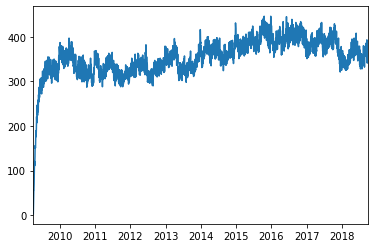

In [56]:
IPinstance.IPMORNcurrent_los_mean.plot()

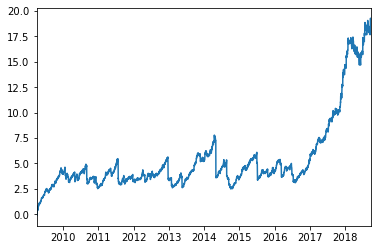

In [52]:
IPinstance.IPMORNcurrent_los_skew.plot()

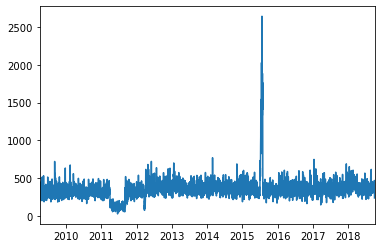

In [53]:
EDinstance.EDMORNwait_time_mean.plot()

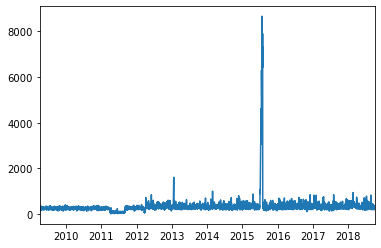

In [54]:
EDinstance.EDMORNwait_time_std.plot()

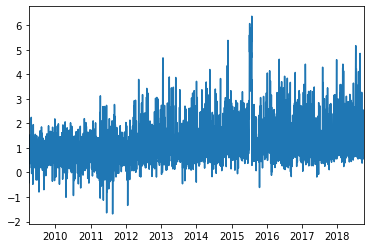

In [55]:
EDinstance.EDMORNwait_time_skew.plot()

In [66]:
break

SyntaxError: 'break' outside loop (<ipython-input-66-6aaf1f276005>, line 4)

In [5]:
ED.head()

,dept_patid,hosp_patid,age,gender,site,arrive_datetime,arrive_mode,first_triage_datetime,first_dr_datetime,first_adm_request_datetime,...,waiting_time,arr_triage_wait,arr_dr_wait,arr_adm_req_wait,adm_req_dep_wait,dr_adm_req_wait,dr_dep_wait,breach_flag,breach_datetime,age_group
0,90902325901,004101045105,94.0,F,Main ED,2009-04-13 09:16:00,NaN,NaT,2009-04-13 10:28:00,NaT,...,188.0,NaN,72.0,NaN,NaN,NaN,116.0,0,2009-04-13 13:16:00,65+
1,90902326101,644868441371,47.0,M,Main ED,2009-04-13 09:22:00,NaN,NaT,2009-04-13 09:30:00,NaT,...,213.0,NaN,8.0,NaN,NaN,NaN,205.0,0,2009-04-13 13:22:00,18-64
2,90902326501,668666687357,0.0,M,Main ED,2009-04-13 09:31:00,NaN,NaT,2009-04-13 10:00:00,NaT,...,143.0,NaN,29.0,NaN,NaN,NaN,114.0,0,2009-04-13 13:31:00,0-17
3,90902328601,446747461391,4.0,M,Main ED,2009-04-13 10:52:00,NaN,NaT,2009-04-13 11:30:00,NaT,...,177.0,NaN,38.0,NaN,NaN,NaN,139.0,0,2009-04-13 14:52:00,0-17
4,90902328801,423646238168,31.0,F,Main ED,2009-04-13 11:18:00,NaN,NaT,2009-04-13 12:00:00,NaT,...,211.0,NaN,42.0,NaN,NaN,NaN,169.0,0,2009-04-13 15:18:00,18-64


## Summary Daily calcs

##### Vars to calc
ED: 
- no attendances
- no admissions
- no ambulances
- ages: mean, std, no > 65, no >75
- 

IP:
- no admissions
    (by type: elec, non-elec, etc)
    (by age: mean, > 65, > 75)
    
- no discharges

Extras (very complicated):
- peak occupancy of day
- % occupancy, wrt to total numbers of beds (from previous)

In [8]:
for date in target.index[0:2]:
    print(date)

2012-01-01 00:00:00
2012-01-02 00:00:00


In [46]:
IP.columns

Index(['hosp_patid', 'adm_datetime', 'move_total', 'adm_loc', 'dis_loc',
       'admission_method', 'admission_type', 'spel_los', 'gender', 'site',
       'age_group', 'age', 'adm_year', 'adm_month', 'adm_dayofweek',
       'adm_dayofweek_name', 'adm_flag_wkend', 'adm_hour', 'adm_day',
       'adm_week', 'adm_date', 'adm_flag_wkend', 'dis_hour', 'dis_dayofweek',
       'dis_month', 'dis_week', 'dis_dayofweek_name', 'dis_year',
       'dis_datetime', 'dis_destination', 'dis_method', 'dis_day', 'dis_date',
       'dis_flag_wkend'],
      dtype='object')

In [45]:
IP.head()

,hosp_patid,adm_datetime,move_total,adm_loc,dis_loc,admission_method,admission_type,spel_los,gender,site,...,dis_month,dis_week,dis_dayofweek_name,dis_year,dis_datetime,dis_destination,dis_method,dis_day,dis_date,dis_flag_wkend
0,90,2011-09-13 00:12:00,2,CLINICAL DECISIONS UNIT AE,2,21,Non-Elective,7,2,SGH,...,9.0,38.0,Tuesday,2011.0,2011-09-20 20:00:00,19.0,1.0,20.0,2011-09-20,0
1,90,2011-09-30 13:42:00,1,CLINICAL DECISIONS UNIT AE,1,21,Day Case,0,2,SGH,...,9.0,39.0,Friday,2011.0,2011-09-30 17:44:00,19.0,1.0,30.0,2011-09-30,0
2,90,2012-11-21 09:28:00,1,WARD F3,1,21,Non-Elective,8,2,SGH,...,11.0,48.0,Thursday,2012.0,2012-11-29 15:00:00,51.0,1.0,29.0,2012-11-29,0
3,90,2013-12-12 10:00:00,1,MEDICAL ENDOSCOPY UNIT E LEVEL,1,11,Day Case,0,2,SGH,...,12.0,50.0,Thursday,2013.0,2013-12-12 13:15:00,19.0,1.0,12.0,2013-12-12,0
4,90,2014-07-20 14:32:00,1,CLINICAL DECISIONS UNIT AE,1,21,Day Case,0,2,SGH,...,7.0,29.0,Sunday,2014.0,2014-07-20 16:45:00,19.0,1.0,20.0,2014-07-20,1


In [90]:
def select_records_in_period(df, datetimes_start, datetime_end, start_col, end_col):
    """
    Takes df and selects only records within time period.
    
    Return
    ======
    sample, dataframe , with only records which are of interest.
    
    """
    sample = df[(df[start_col] < datetime_end) & (df[end_col] >= datetimes_start)]
    return(sample)

def ED_period_calcs(df_sample):
    """
    Make calculations for the period
    """
    calcs = {}
    calcs['attendances'] = len(df_sample) # no attendances
    calcs['admissions'] = len(df_sample[df_sample.adm_flag == 1])
    calcs['age_mean'] = df_sample['age'].mean()
    calcs['age_75plus'] = len(df_sample[df_sample.age >= 75])
    
    
    return(calcs)

def IP_period_calcs(df_sample):
    """
    Make calculations for the period
    """
    calcs = {}
    calcs['patients_total'] = len(df_sample) # no attendances
    calcs['patients_nonelec'] = len(df_sample[df_sample.admission_type == "Non-Elective"])
    calcs['patients_elec'] = len(df_sample[df_sample.admission_type == "Elective"])
    calcs['patients_daycase'] = len(df_sample[df_sample.admission_type == "Day Case"])
    calcs['age_mean_elecnonelec'] = df_sample['age'].mean()
    calcs['age_75plus_elecnonelec'] = len(df_sample[(df_sample.age >= 75) & (df_sample.admission_type != "Day Case")])
    
    
    return(calcs)



def get_daily_df(df, datetimes, df_type):
    """
    Calculate daily features from patient level records.
    
    Input
    =====
    df, dateframe, patient level records.
    datetimes, DateTimeIndex, datetime index of each date features are required for. 
    
    Return
    ======
    
    
    """
    if df_type == 'ED':
        calculation_function = ED_period_calcs
        col_dict = calculation_function(df) # run function once to get list of columns names
        daily_features_columns = list(col_dict.keys())
        select_records_columns = ['arrive_datetime','depart_datetime'] # for use in select_records_in_period function
        
    elif df_type == 'IP':
        calculation_function = IP_period_calcs
        col_dict = calculation_function(df) # run function once to get list of columns names
        daily_features_columns = list(col_dict.keys())
        select_records_columns = ['adm_datetime','dis_datetime']
    
    #### setup new df for results
    daily_features = pd.DataFrame(index=datetimes, columns = daily_features_columns)
    
    #### loop over all records
    for start_date in datetimes:
        #### get records
#         print(start_date)
        end_date = start_date + pd.Timedelta(1, 'd') # cal enddate (1 day behind) - hence will create records based on what happened in the 24 hours of the day.
        selected_records = select_records_in_period(df, start_date, end_date, select_records_columns[0], select_records_columns[1]) # get records for this periods
        
        #### calculate values
        day_calcs = calculation_function(selected_records)
        
        #### assign to dataframe
        
        daily_features.loc[start_date] = pd.Series(day_calcs) #, inplace=True)#[start_date, 'test'] = 5
    
    return(daily_features)

In [91]:
datetime_index = target.index
datetime_index.name = ''

EDdaily = get_daily_df(ED, datetime_index, 'ED') # can calcs into df

In [92]:
# append cols with EDDAILY so features can be understood further down the line
def add_suffix_df_columns(df, suffix):
    for col in df.columns:
        df.rename(columns={col:suffix+col}, inplace=True)
    return(df)

EDdaily = add_suffix_df_columns(EDdaily, 'EDDAILY')

In [93]:
datetime_index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24',
               '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28',
               '2018-09-29', '2018-09-30'],
              dtype='datetime64[ns]', name='', length=2465, freq=None)

In [94]:
EDdaily.head()

,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_mean,EDDAILYage_75plus
,,,,
2012-01-01,377,151,40.0186,59
2012-01-02,350,139,42.2114,44
2012-01-03,356,125,45.1011,58
2012-01-04,284,92,42.5035,49
2012-01-05,307,120,48.3225,70


In [95]:
EDdaily.tail()

,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_mean,EDDAILYage_75plus
,,,,
2018-09-26,487,188,44.7064,82
2018-09-27,482,168,44.1992,74
2018-09-28,463,191,46.4989,84
2018-09-29,367,157,40.3597,47
2018-09-30,454,174,41.5308,66


In [81]:
EDdaily.tail()

,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_mean,EDDAILYage_75plus
,,,,
2018-09-26,487,188,44.7064,82
2018-09-27,482,168,44.1992,74
2018-09-28,463,191,46.4989,84
2018-09-29,367,157,40.3597,47
2018-09-30,454,174,41.5308,66


 Must shift the dataframe so that features for a date use data from the previous day

In [99]:
EDdaily = EDdaily.shift(1)

In [105]:
EDdaily.tail()

,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_mean,EDDAILYage_75plus
,,,,
2018-09-26,446,182,42.9126,62
2018-09-27,487,188,44.7064,82
2018-09-28,482,168,44.1992,74
2018-09-29,463,191,46.4989,84
2018-09-30,367,157,40.3597,47


In [100]:
EDdaily.to_pickle('./../../data/interim/D2_timeseries/EDdaily.pkl')

# IPcalcs

In [102]:
datetime_index = target.index
datetime_index.name = ''

IPdaily = get_daily_df(IP, datetime_index, 'IP') # can calcs into df
IPdaily = add_suffix_df_columns(IPdaily, 'IPDAILY')

In [103]:
IPdaily.head()

,IPDAILYpatients_total,IPDAILYpatients_nonelec,IPDAILYpatients_elec,IPDAILYpatients_daycase,IPDAILYage_mean_elecnonelec,IPDAILYage_75plus_elecnonelec
,,,,,,
2012-01-01,1185,1001,141,43,57.3814,441
2012-01-02,1228,1037,141,50,57.4292,453
2012-01-03,1564,1074,208,282,55.5352,475
2012-01-04,1535,1066,241,228,55.4072,482
2012-01-05,1625,1095,259,271,55.2702,499


In [104]:
IPdaily.tail()

,IPDAILYpatients_total,IPDAILYpatients_nonelec,IPDAILYpatients_elec,IPDAILYpatients_daycase,IPDAILYage_mean_elecnonelec,IPDAILYage_75plus_elecnonelec
,,,,,,
2018-09-26,2,1,1,0,35.5,0
2018-09-27,2,1,1,0,35.5,0
2018-09-28,1,0,1,0,0,0
2018-09-29,1,0,1,0,0,0
2018-09-30,1,0,1,0,0,0


In [77]:
IPdaily.tail()

,IPDAILYpatients_total,IPDAILYpatients_nonelec,IPDAILYpatients_elec,IPDAILYpatients_daycase,IPDAILYage_mean_elecnonelec,IPDAILYage_75plus_elecnonelec
,,,,,,
2018-09-26,2,1,1,0,35.5,0
2018-09-27,2,1,1,0,35.5,0
2018-09-28,1,0,1,0,0,0
2018-09-29,1,0,1,0,0,0
2018-09-30,1,0,1,0,0,0


 Must shift the dataframe so that features for a date use data from the previous day

In [106]:
IPdaily = IPdaily.shift(1)

In [107]:
IPdaily.tail()

,IPDAILYpatients_total,IPDAILYpatients_nonelec,IPDAILYpatients_elec,IPDAILYpatients_daycase,IPDAILYage_mean_elecnonelec,IPDAILYage_75plus_elecnonelec
,,,,,,
2018-09-26,2,1,1,0,35.5,0
2018-09-27,2,1,1,0,35.5,0
2018-09-28,2,1,1,0,35.5,0
2018-09-29,1,0,1,0,0,0
2018-09-30,1,0,1,0,0,0


# WARNING: IP data after 2018-5-31 is missing !

In [108]:
IPdaily.to_pickle('./../../data/interim/D2_timeseries/IPdaily.pkl')

In [101]:
break

SyntaxError: 'break' outside loop (<ipython-input-101-6aaf1f276005>, line 4)

In [65]:
%matplotlib inline

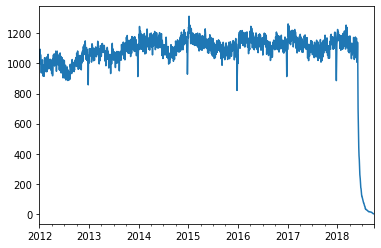

In [66]:
IPdaily.IPDAILYpatients_nonelec.plot()

In [73]:
IPdaily.tail(150)

,IPDAILYpatients_total,IPDAILYpatients_nonelec,IPDAILYpatients_elec,IPDAILYpatients_daycase,IPDAILYage_mean,IPDAILYage_65plus
,,,,,,
2018-05-04,1810,1115,365,330,55.7083,895
2018-05-05,1475,1041,318,116,57.1451,763
2018-05-06,1376,1027,262,87,58.0814,734
2018-05-07,1343,1055,233,55,57.8727,716
2018-05-08,1739,1115,305,319,56.6199,871
2018-05-09,1789,1119,349,321,56.2448,890
2018-05-10,1807,1123,347,337,56.5462,905
2018-05-11,1779,1149,337,293,56.0461,888
2018-05-12,1544,1108,296,140,56.9858,788
